In [22]:
from numpy.random import rand
import numpy as np
import sys,os
sys.path.append(os.pardir)
from tools.models.regressors.gaussian_process_regressor import GaussianProcessRegressor
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

In [23]:
def generate(N,func,window=10,center=0 ,epsilon=1):
    x = (rand(N)-0.5) * window + center
    y = func(x)  + epsilon*np.random.randn(N)
    return x,y

In [24]:
def plot_gp(X, Y, title,func_true,x_range=None,model=None,k=2,grid=300,save_dir=None):
    """kσ区間"""
    if x_range is None:
        x_range=(min(X),max(X))
    fig = plt.figure()
    #ax = fig.add_subplot(111)
    plt.scatter(X, Y, color="blue", marker="o",label="observation")
    x = np.linspace(x_range[0],x_range[1], grid)
    y_true = func_true(x)
    plt.plot(x, y_true, color='blue',label="actual")
    if model is not None:
        mu,sigma = model.calc_mu_sigma(x)
        y_std=np.sqrt(np.diag(sigma))
        mu=mu.flatten()
        plt.plot(x, mu, color='red',label="predict_mean")
        plt.fill_between(x, mu - k*y_std, mu + k*y_std, color="green", alpha=0.5, label="predict_std")
    plt.legend()
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("y")
    if save_dir is not None:
        plt.savefig(str(save_dir/f"{title}.png"))
    plt.show()

In [35]:
class GaussianKernel:
    def __init__(self,h,a=1):
        self.h = h
        self.a = a
        
    def run(self,x,y):
        return self.a*np.exp(-((x-y)/self.h)**2)

In [36]:
from numpy.random import multivariate_normal
def plot_sampled_functions(N,x,mu,sigma,colors=["r", "g", "b", "c", "m", "y", "k", "w"]):
    sampled_fs = multivariate_normal(mu, sigma, N)
    fig = plt.figure()
    for c,f in enumerate(sampled_fs):
        plt.plot(x, f, color=colors[c])
    plt.title("Sampled")
    plt.show()
    

In [102]:
f = lambda x :x* np.cos(x)

In [117]:
X,y=generate(N=100,func=f,window=20,epsilon=0)

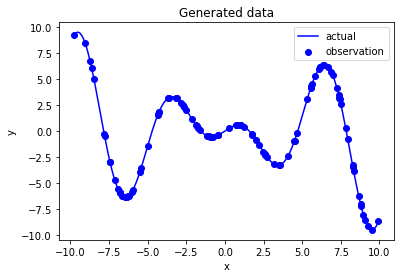

In [118]:
plot_gp(X=X,Y=y,title="Generated data",func_true=f)

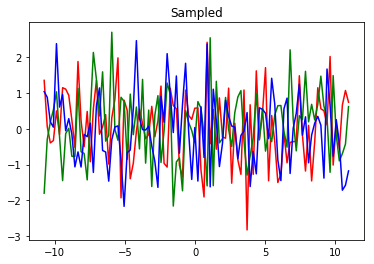

In [128]:
grid=100
x_range=(min(X)-1,max(X)+1)
x = np.linspace(x_range[0],x_range[1], grid)
mu = np.zeros(len(x))
sigma  = np.eye(len(x))
plot_sampled_functions(3,x,mu,sigma)

In [120]:
kernel=GaussianKernel(h=0.4)
model=GaussianProcessRegressor(kernel=kernel,c=0.1)

In [121]:
model.fit(X,y)

/Users/hikaru/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: covariance is not positive-semidefinite.
  This is separate from the ipykernel package so we can avoid doing imports until


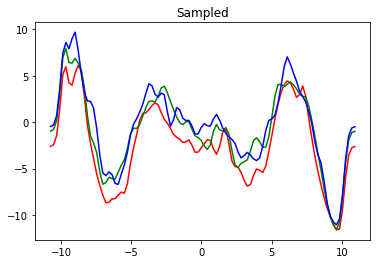

In [122]:
mu,sigma=model.calc_mu_sigma(x)
mu=mu.flatten()
    
plot_sampled_functions(3,x,mu,sigma)

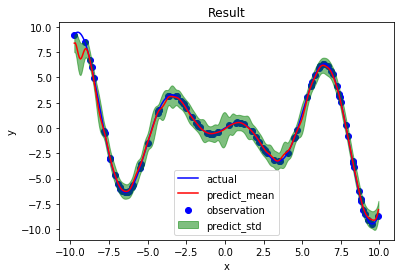

In [123]:
plot_gp(X=X,Y=y,title="Result",func_true=f,model=model)

## gif作成

In [125]:
def gif_experiment(N,window,epsilon,f,kernel,c,save_dir):
    X,y=generate(N=N,func=f,window=window,epsilon=epsilon)
    x_range=(min(X)-1,max(X)+1)
    im_list=[]
    for i in range(N):
        model=GaussianProcessRegressor(kernel=kernel,c=0.1)
        model.fit(X[:i+1],y[:i+1])
        plot_gp(X=X[:i+1],Y=y[:i+1],title=f"Observation : {i+1:2d}",func_true=f,model=model,x_range=x_range,save_dir=save_dir)

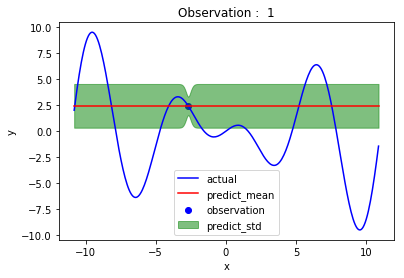

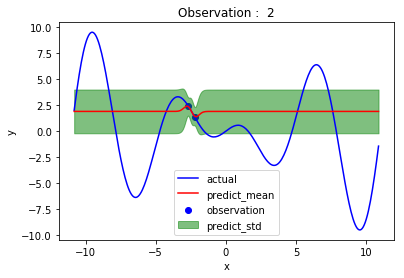

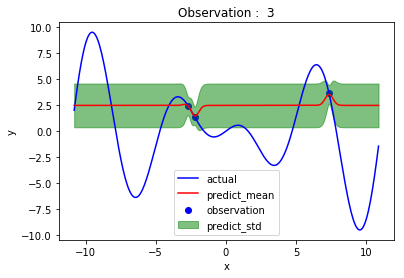

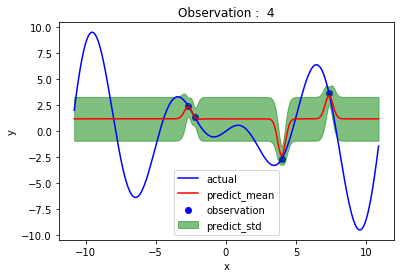

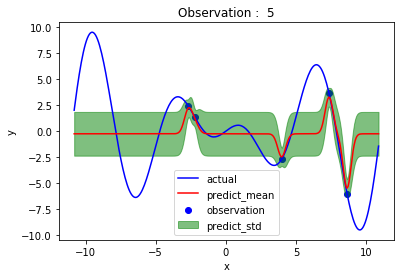

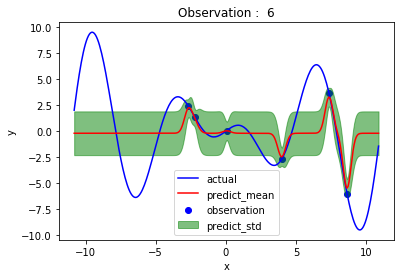

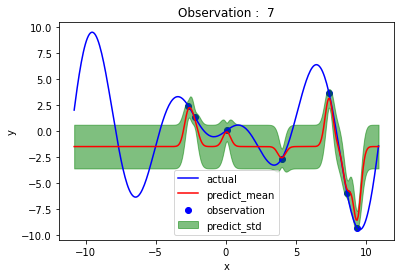

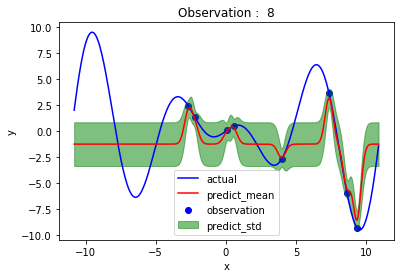

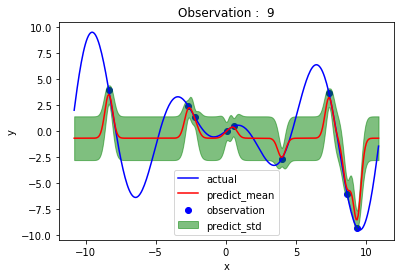

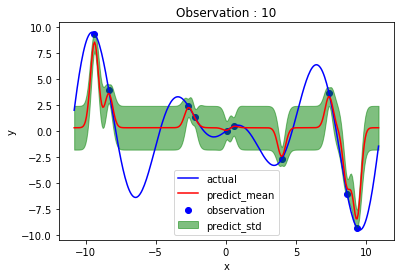

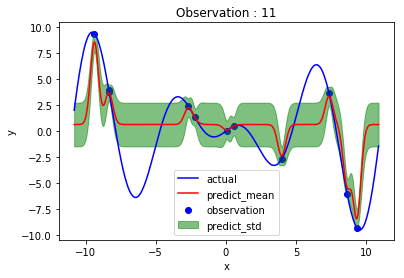

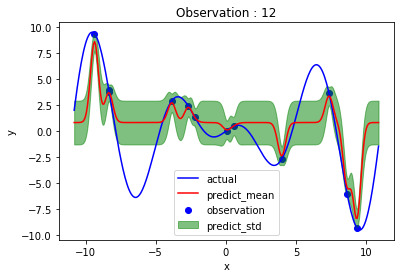

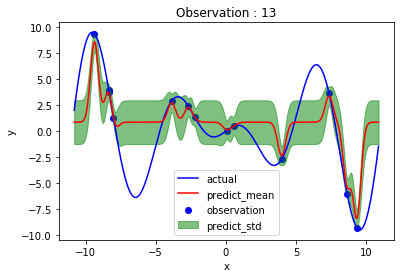

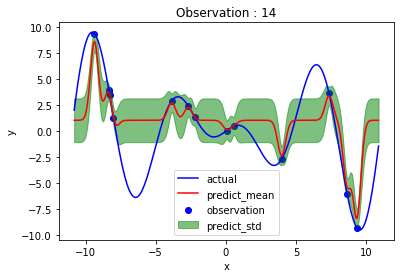

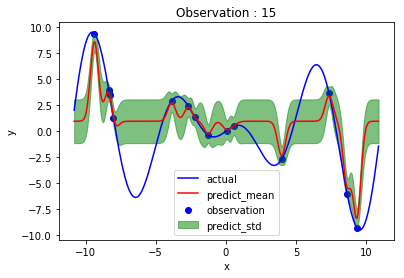

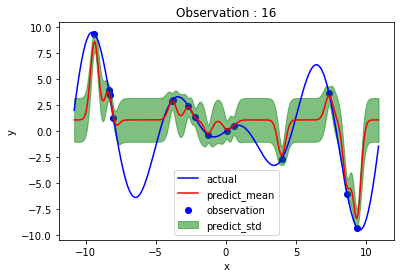

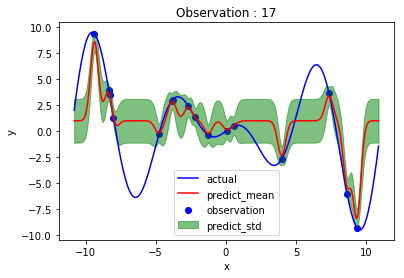

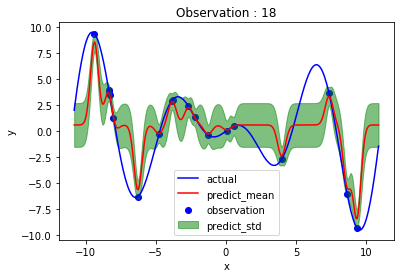

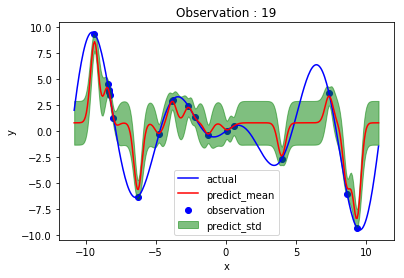

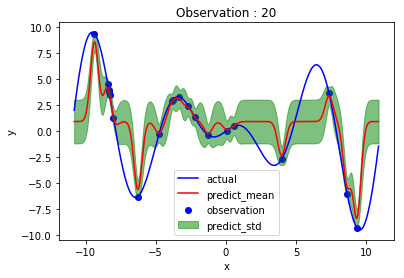

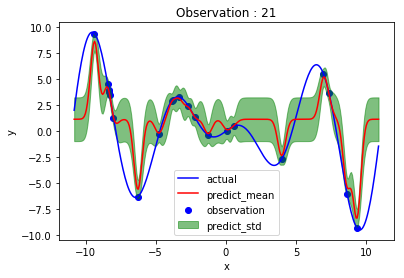

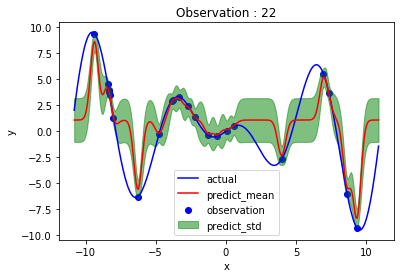

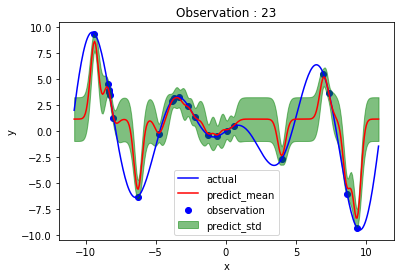

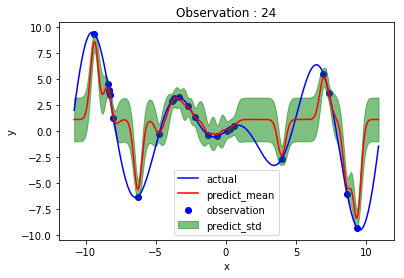

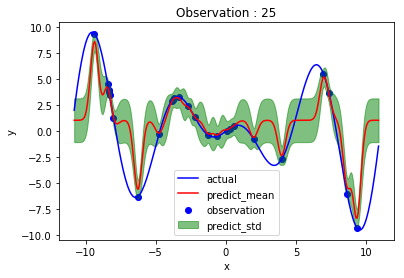

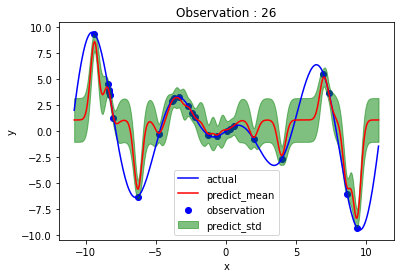

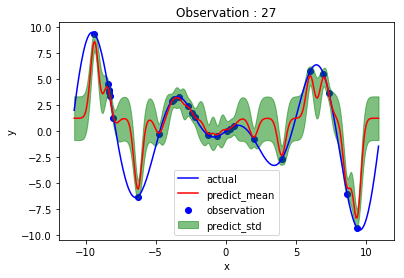

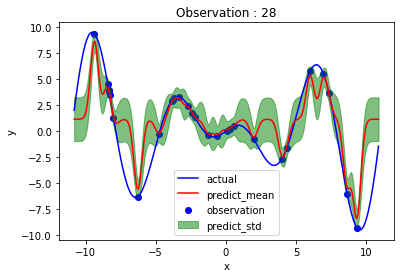

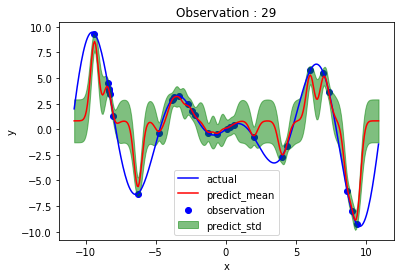

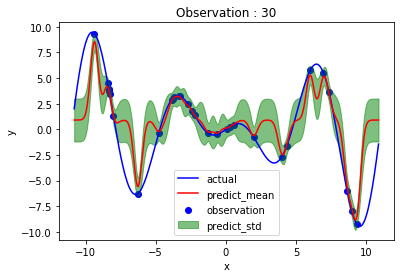

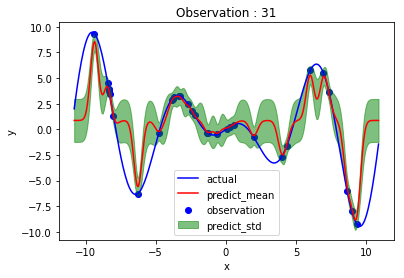

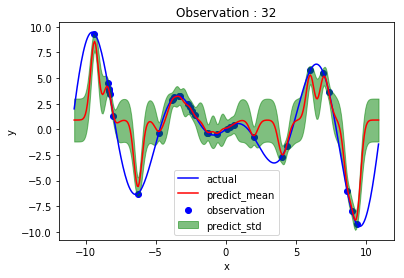

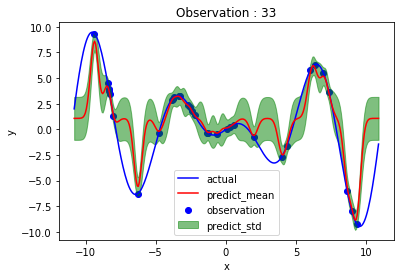

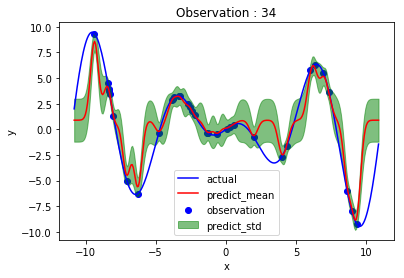

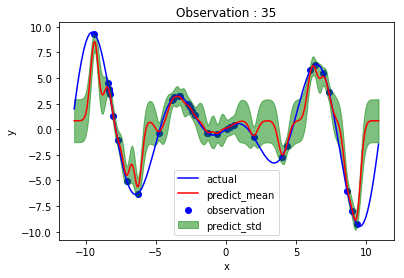

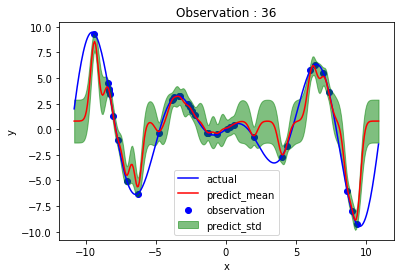

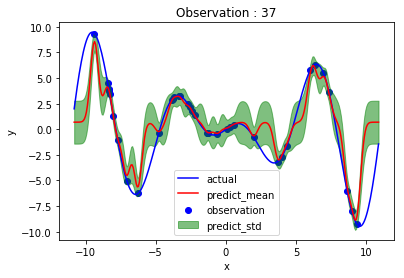

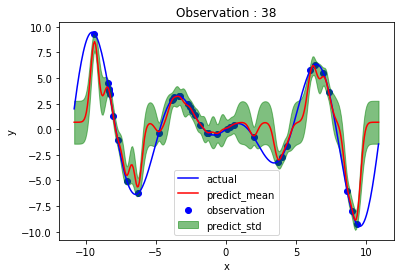

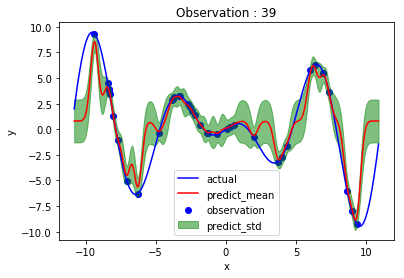

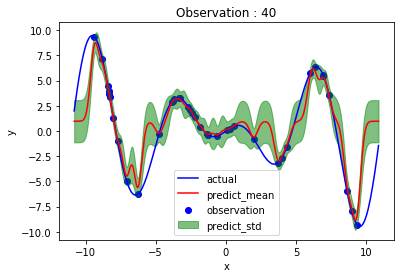

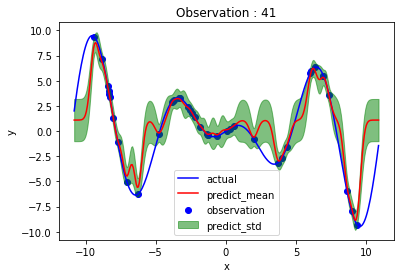

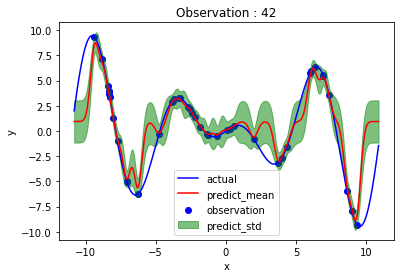

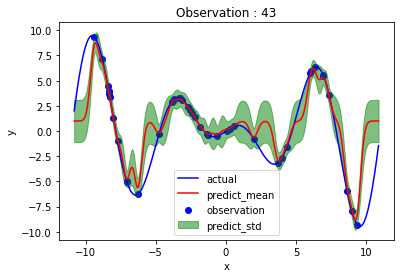

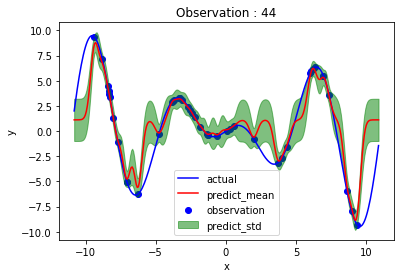

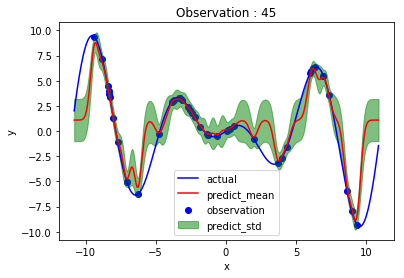

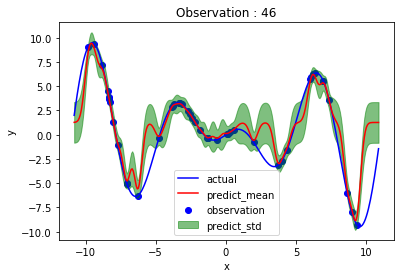

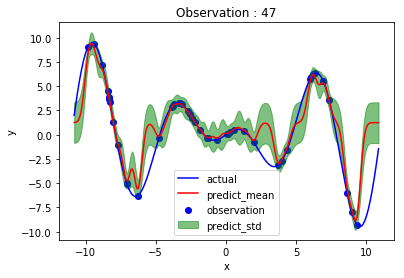

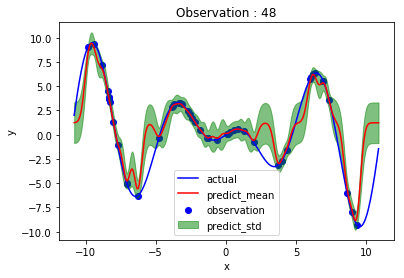

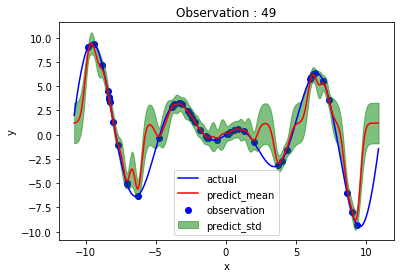

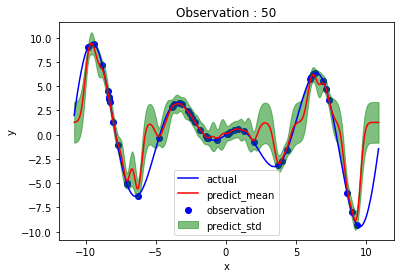

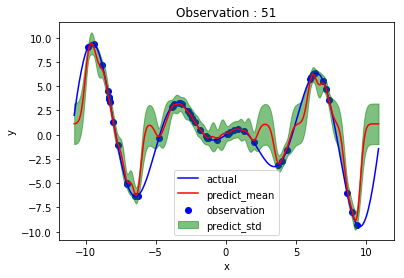

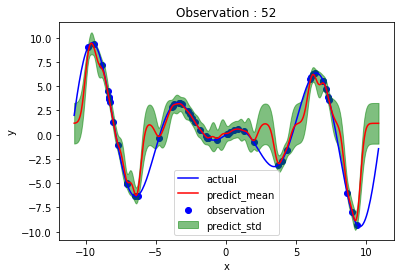

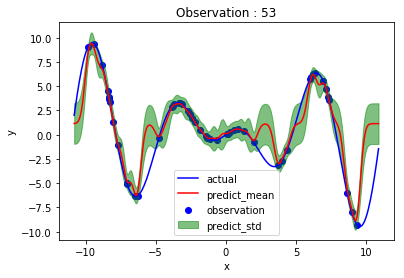

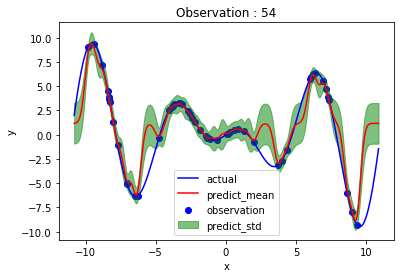

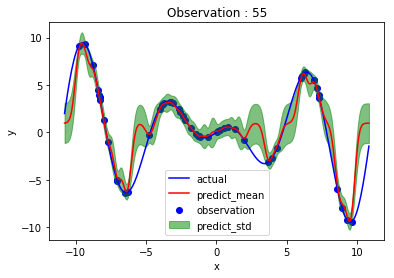

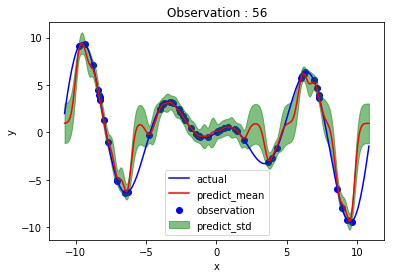

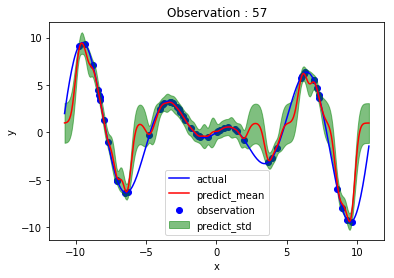

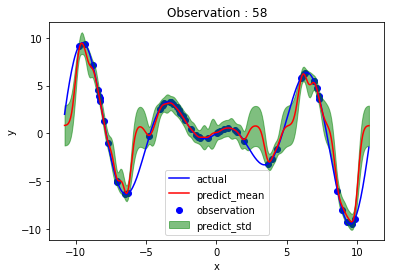

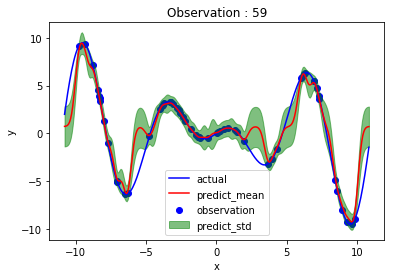

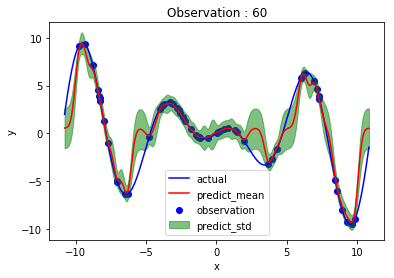

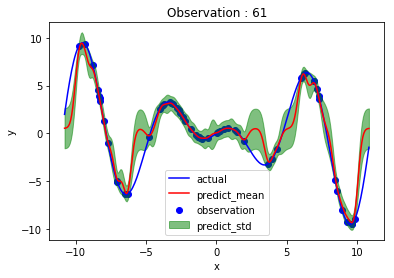

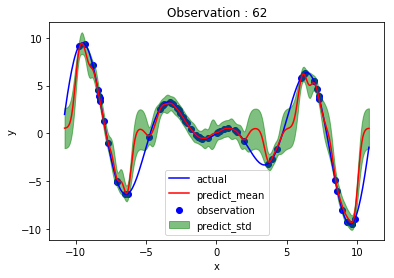

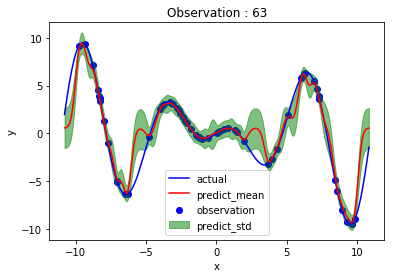

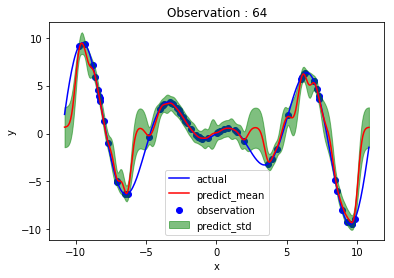

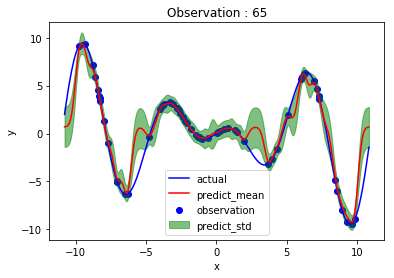

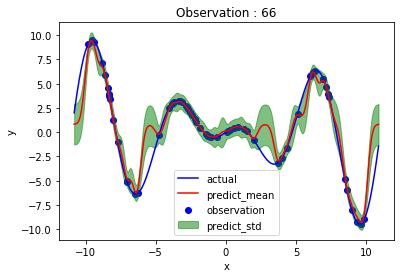

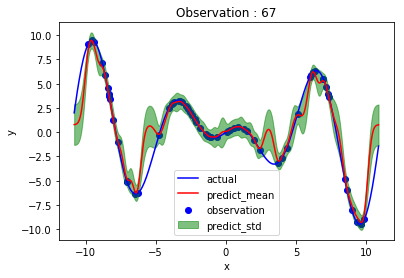

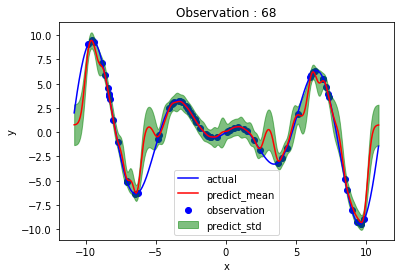

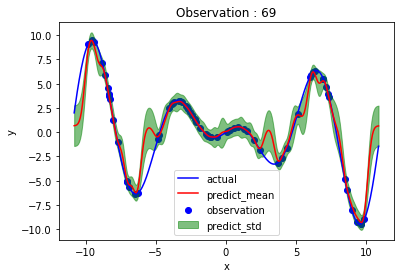

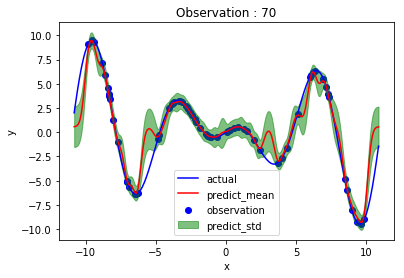

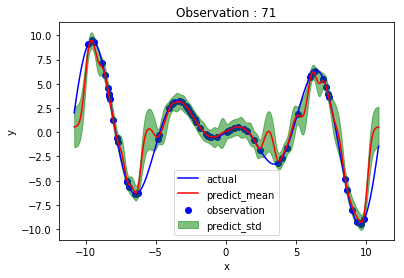

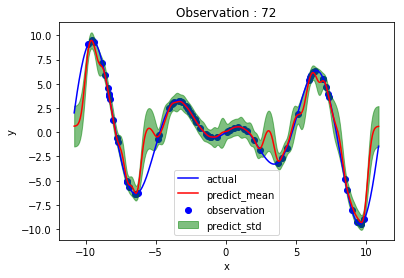

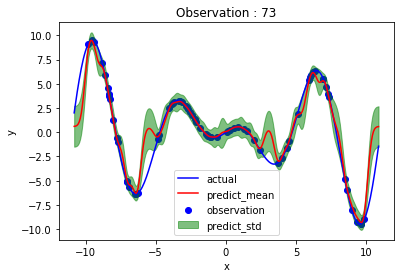

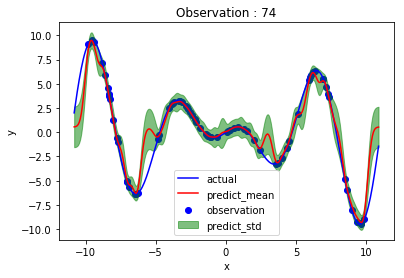

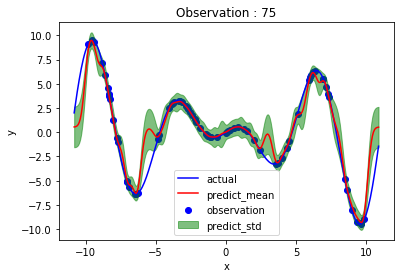

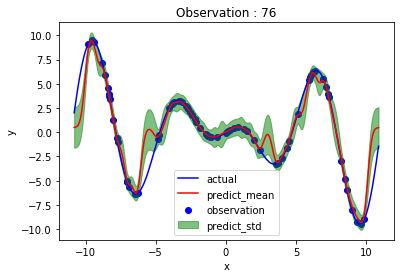

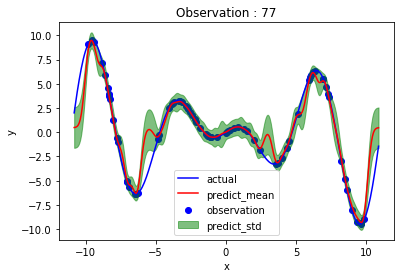

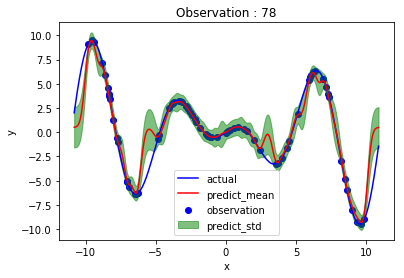

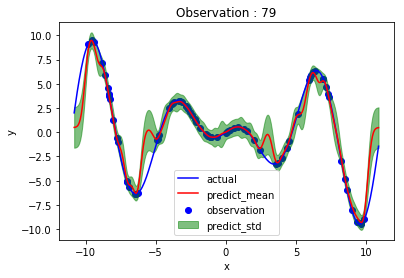

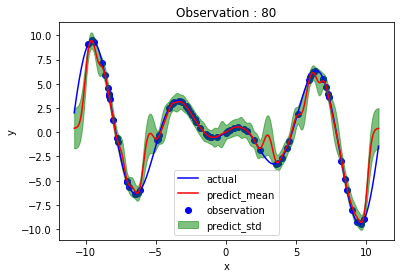

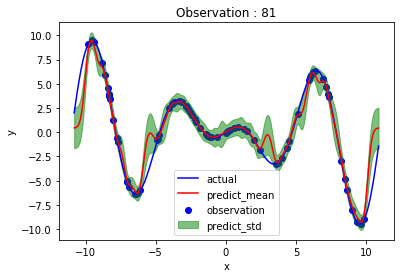

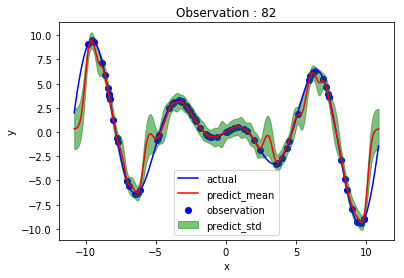

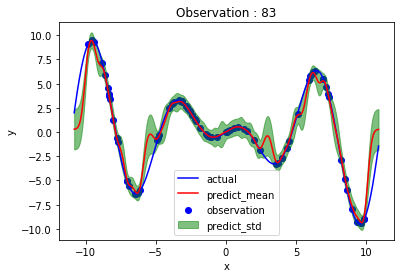

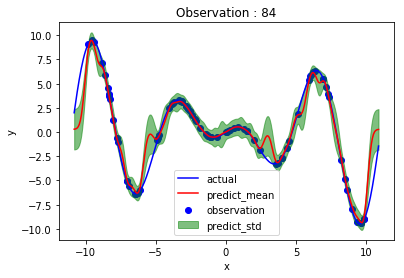

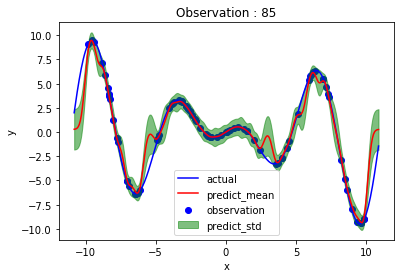

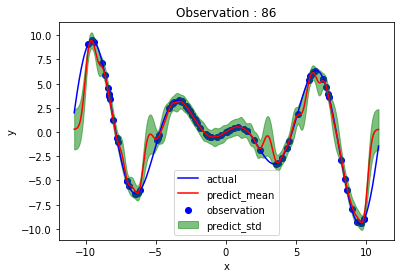

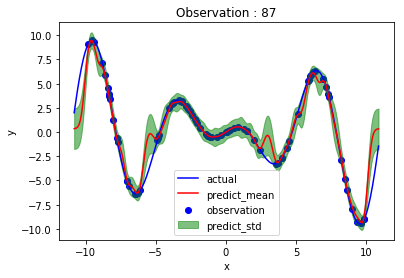

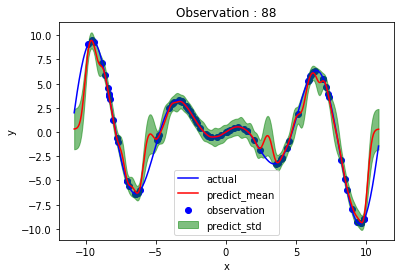

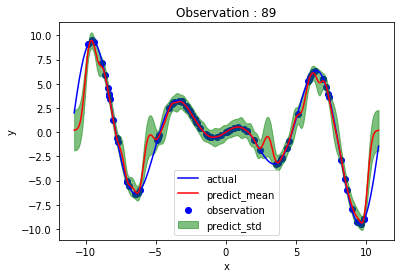

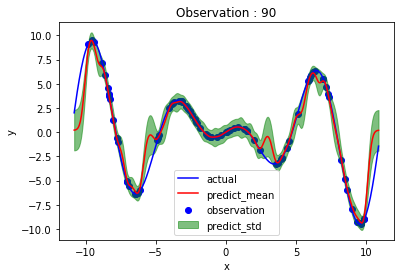

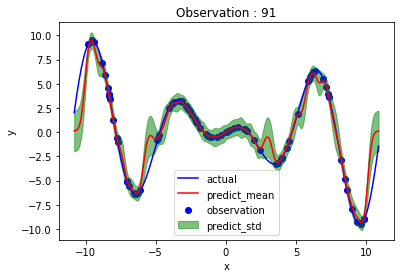

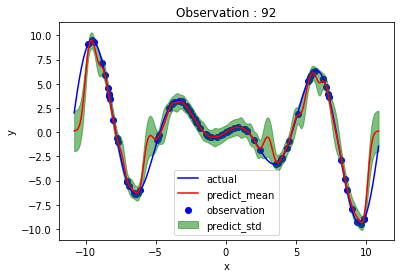

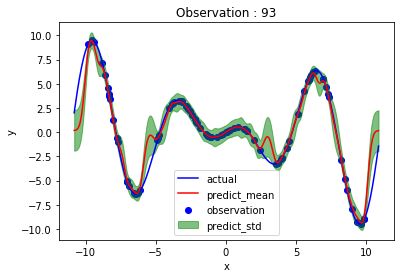

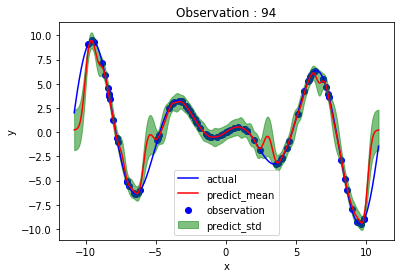

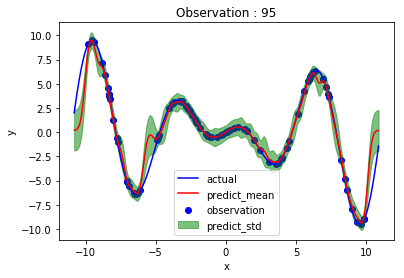

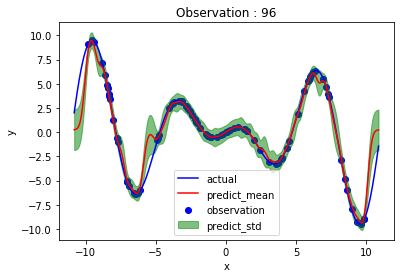

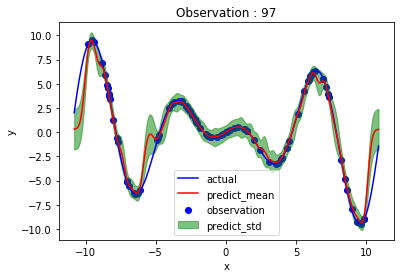

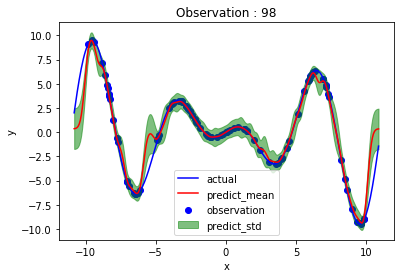

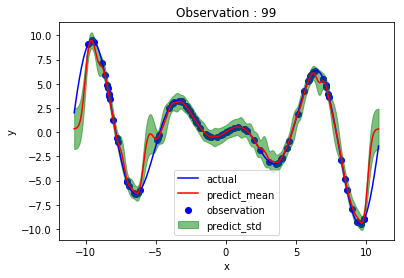

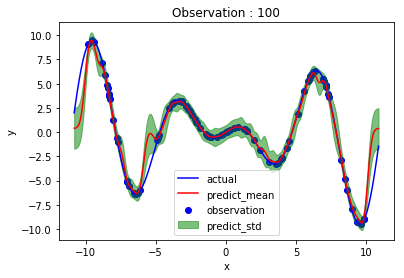

In [127]:
# gif
N=100
window=20
epsilon=0
kernel=GaussianKernel(h=0.4,a=1)
c=0.1
save_dir=Path("../data/images")
f = lambda x :x* np.cos(x)

gif_experiment(N,window,epsilon,f,kernel,c,save_dir)